<a href="https://colab.research.google.com/github/virb30/spotify-clustering/blob/main/Clustering_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering a partir de Dados do Spotify

O Spotify é o serviço mais popular de streaming de aúdio do mundo que visa unir produtores e consumidores de músicas e podcasts de maneira eficiente, em uma plataforma fácil e intuitiva. O Spotify conta hoje com 356 milhões de usuários, incluindo 158 milhões de assinantes, em 178 países.

Como é de se imaginar, o Spotify gera uma grande quantidade de dados, e faz bom uso deles, principalmente em seus sistemas de recomendação.

As principais *features* que se valem dos sistemas de recomendação que encontramos no Spotify são, entre outras:
* Daily Mix
* Discover Weeky
* Song Radios
* Your Year Wrapped

Maiores detalhes sobre os sistemas de recomendação do Spotify podem ser vistos [nessa palestra](https://www.youtube.com/watch?v=2VvM98flwq0&t=677s).


Nesse projeto iremos estudar uma das técnicas utilizadas nos sistemas de recomendação do Spotify e das principais empresas de entretenimento: o Clustering.


## Clustering

Clustering é uma técnica de *Machine Learning* pertencente à classe de Aprendizado Não-Supervisionado.

<center><img src="https://ichi.pro/assets/images/max/724/0*MRsUA35nZDyDZwC0.jpg" /></center>

A técnica de Clustering consistem em agrupar conjuntos de dados semelhantes em um mesmo *Cluster*. O algoritmo mais utilizado para esse tipo de tarefa é o [K-Means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Esse algoritmo calcula a distância dos pontos até os *Centroids*, que ficarão no centro de cada *Cluster*.

## Como Saber quantos Clustar Usar?

Nosso algoritmo não será capaz de definir quantos *clusters* utilizar. É tarefa do cientista de dados determinar esse número e informar, por parâmetro, ao algoritmo. Para obtermos essa quantidade podemos utilizar algumas técnicas:

* Inspeção Visual dos Dados
* Conhecimento prévio sobre os dados/objetivos e um número pré-definido de clusters.
* Elbow Method, ou, em tradução livre, o "Método do Cotovelo". Esse método compara a distância média de cada ponto até o centro do cluster para diferentes números de clusters.

## Informações sobre o K-Means

O algoritmo K-Means utiliza a distância entre os pontos, portanto ele é muito sensível à escala dos dados. Por isso, antes de utilizá-lo, devemos tratar nossos dados para que fiquem em uma escala menor. Para isso podemos utilizar de duas ferramentas disponíveis na biblioteca `sklearn`:

`StandardScaler` - transforma os dados de forma a obter média 0 e desvio padrão 1.

`MinMaxScaler` - coloca todos os números numa escala entre 0 e 1.

Naturalmente, isso irá trazer os pontos mais próximos uns dos outros. Essas técnicas também ajudam a reduzir o impacto de outliers em nossos dados.

### K-Means e Clusters
Ao iniciar a otimização os centroids são colocados aleatoriamente nos dados o que significa que a cada execução do algoritmo, podemos obter resultados diferentes, especialmente se não soubermos quantos clusters utilizar.

## Sistemas de Recomendação

Antes de darmos início ao nosso projeto, precisamos entender quais os tipos de sistemas de recomendação, para então entendermos em qual deles nosso projeto se enquadra.

* Collaborative Filtering - Comportamento de usuário.
* Content-Based Filtering - Baseado nas informações dos produtos.
* Hybrid Recommendation Systems - Combinação dos dois anteriores.

Como iremos realizar o clustering a partir das características das músicasm nosso projeto seria um dos passos para a criação de um sistema de recomendação do tipo *Content-Based Filtering*.

Vale lembrar que a maioria dos sistemas de recomendação (Amazon, Spotify, Netflix) é do tipo Híbrido

## Os Dados

Os dados utilizdos para esse projeto foram extraídos da API do spotify com parâmetro "year:2020" e conta com 977 músicas.

As etapas de extração e remoção dos dados duplicados podem ser vistas nesse [link](https://github.com/virb30/spotify-clustering/).

In [58]:
# importando pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# allowing all the columns to be visualized
pd.options.display.max_columns = None

#rendering all graphics straight out of the notebook
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [59]:
# importando dados
df = pd.read_csv('https://raw.githubusercontent.com/virb30/spotify-clustering/main/spotify_data.csv')

# visualizando dimensões do dataframe
print('Dimensões do DataFrame',
      f'\nVariáveis: {df.shape[1]}',
      f'\nEntradas: {df.shape[0]}')

# verificando primeiras entradas
df.head()

Dimensões do DataFrame 
Variáveis: 18 
Entradas: 978


,Unnamed: 0,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Dua Lipa,Levitating (feat. DaBaby),463CkQjx2Zk1yXoBuierM9,90,0.7020,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.9150,102.977,203064,4
1,1,Hammock,Longest Year - 2020,51TAp7p7B3xboCl5HWmEkF,26,0.0692,0.285,2,-14.854,1,0.0482,0.70000,0.673000,0.1990,0.0312,78.572,533707,4
2,2,The Weeknd,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,93,0.5140,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.3340,171.005,200040,4
3,3,Tame Impala,Alter Ego - 2020 Mix,457sndKohlwTU6dW6amBMU,52,0.4080,0.903,0,-2.924,1,0.0561,0.00256,0.000821,0.1170,0.3680,128.942,289867,4
4,4,Kali Uchis,telepatía,6tDDoYIxWvMLTdKpjFkc1B,90,0.6530,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.5530,83.970,160191,4


In [60]:
# remover coluna excedente
df = df.drop(columns=['Unnamed: 0'], axis=1)
# verificar primeiras entradas
df.head()

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Dua Lipa,Levitating (feat. DaBaby),463CkQjx2Zk1yXoBuierM9,90,0.7020,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.9150,102.977,203064,4
1,Hammock,Longest Year - 2020,51TAp7p7B3xboCl5HWmEkF,26,0.0692,0.285,2,-14.854,1,0.0482,0.70000,0.673000,0.1990,0.0312,78.572,533707,4
2,The Weeknd,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,93,0.5140,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.3340,171.005,200040,4
3,Tame Impala,Alter Ego - 2020 Mix,457sndKohlwTU6dW6amBMU,52,0.4080,0.903,0,-2.924,1,0.0561,0.00256,0.000821,0.1170,0.3680,128.942,289867,4
4,Kali Uchis,telepatía,6tDDoYIxWvMLTdKpjFkc1B,90,0.6530,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.5530,83.970,160191,4


In [61]:
# lista de colunas que possuem features numéricas
numeric_features = [x for x in range(3,16)]

# selecionando features numericas
df_num = pd.DataFrame(df.iloc[:, numeric_features].values)

#salvando os nomes das colunas
cols = df.iloc[:,numeric_features].columns

In [62]:
# colocando os dados na mesma escala
scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(df_num))
scaled.columns = cols

# visualizando dados na mesma escala
scaled.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.967391,0.716327,0.823214,0.545455,0.847406,0.0,0.064416,0.008864,0.000000,0.049126,0.935583,0.514484,0.212004
1,0.271739,0.070612,0.277705,0.181818,0.498993,1.0,0.051661,0.702811,0.679798,0.186095,0.031902,0.392554,0.619586
2,1.000000,0.524490,0.727245,0.090909,0.779814,1.0,0.064094,0.001465,0.000096,0.072336,0.341513,0.854359,0.208276
3,0.554348,0.416327,0.902010,0.000000,0.874575,1.0,0.060129,0.002569,0.000829,0.100749,0.376278,0.644208,0.319005
4,0.967391,0.666327,0.519143,1.000000,0.682786,0.0,0.053805,0.112449,0.000000,0.190258,0.565440,0.419523,0.159154


Nos passos anteriores realizamos alguns tratamentos nos nossos dados:
1. Removemos as colunas sem informação relevante
2. Extraímos as variáveis numéricas
3. Aplicamos o algoritmo de escala `MinMaxScaler` a essas variáveis

Em seguida iremos plotar o gráfico do Elbow Method para os dados originais utilizando de 1 a 14 clusters para identificarmos qual a melhor quantidade de Clusters para nosso cenário.

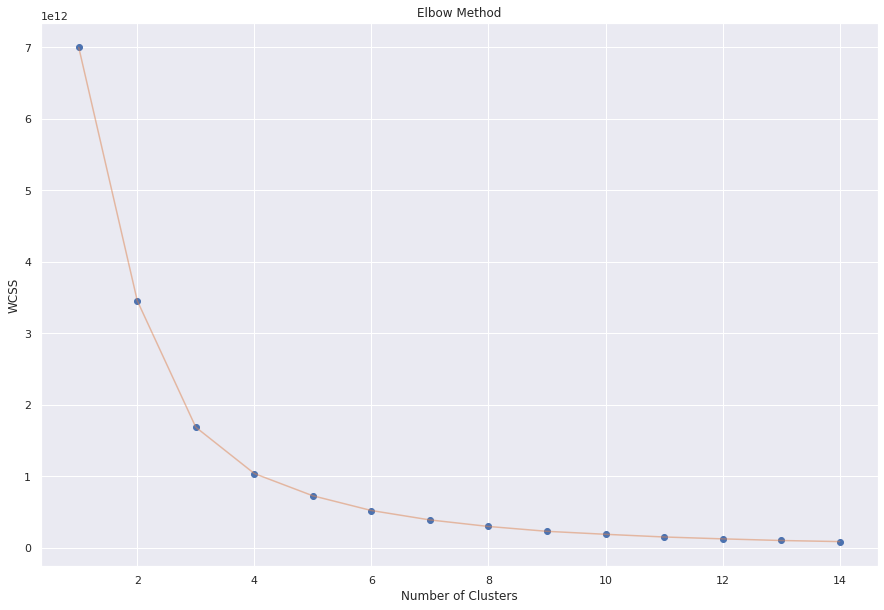

In [63]:
# dados originais
wcss = []
for i in range(1,15):
  # instanciando o modelo
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  # dando fit nos dados
  kmeans.fit(df_num)
  # salvando resultados na lista
  wcss.append(kmeans.inertia_)

# plotando o elbow method
plt.figure(figsize=(15,10))
plt.plot(range(1,15), wcss, 'o')
plt.plot(range(1,15), wcss, '-', alpha=0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

E faremos o mesmo procedimento para os dados normalizados.

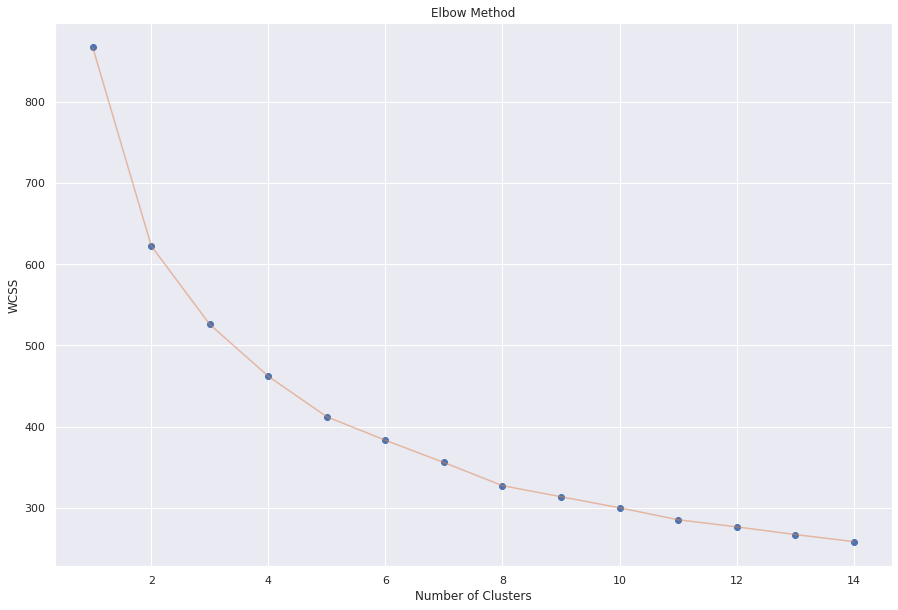

In [64]:
# dados normalizados
wcss = []
for i in range(1,15):
  # instanciando o modelo
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  # dando fit nos dados
  kmeans.fit(scaled)
  # salvando resultados na lista
  wcss.append(kmeans.inertia_)

# plotando o elbow method
plt.figure(figsize=(15,10))
plt.plot(range(1,15), wcss, 'o')
plt.plot(range(1,15), wcss, '-', alpha=0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

In [65]:
# verificar os resultados
print('Lista com Erros: ', wcss)

Lista com Erros:  [866.8849460078299, 622.445911400888, 525.8571138587399, 462.00601564421936, 412.13179592282006, 383.28628412481294, 355.8922450714775, 327.3706270484231, 313.748520605884, 300.14240702138767, 285.4246587257841, 276.67567051781623, 267.214754216345, 258.52536586563633]


In [66]:
# diferença entre os elementos
dif = np.diff(wcss)
print('Diferença Entre os Elements: ', dif)

Diferença Entre os Elements:  [-244.43903461  -96.58879754  -63.85109821  -49.87421972  -28.8455118
  -27.39403905  -28.52161802  -13.62210644  -13.60611358  -14.7177483
   -8.74898821   -9.4609163    -8.68938835]


Aparentemente 8 é um bom número de clusters.

Agora iremos instanciar o modelo utilizando o número correto de clusters que definimos.

In [67]:
# instanciando o modelo
kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(scaled)

Com a previsão realizada, podemos visualizar a distribuição em um gráfico

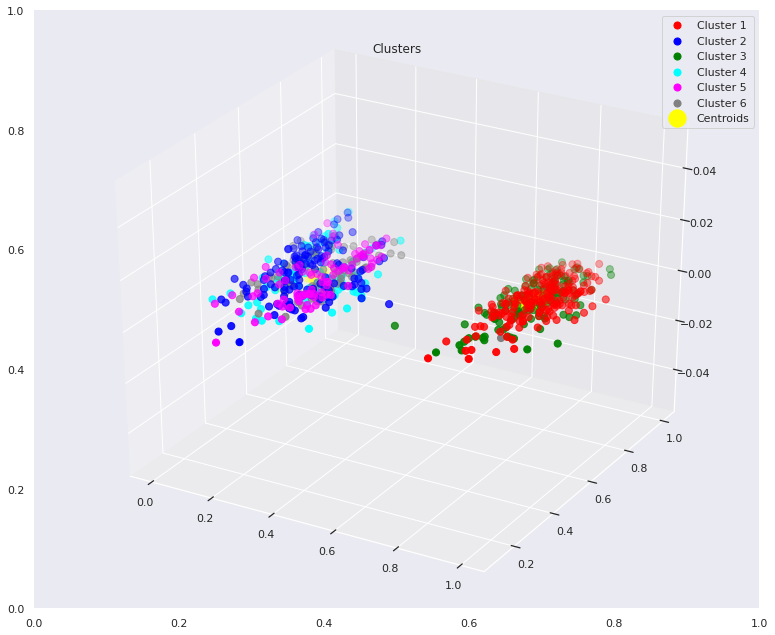

In [68]:
# visualizando os clusters
fig, ax = plt.subplots(figsize=(13,11))
scaled = scaler.fit_transform(df_num)

# definindo a figura em 3 dimensões
ax = fig.add_subplot(111, projection='3d')

# plotando os clusters
plt.scatter(scaled[y_kmeans==0,0], scaled[y_kmeans==0,1], s=50, c='red', label='Cluster 1')
plt.scatter(scaled[y_kmeans==1,0], scaled[y_kmeans==1,1], s=50, c='blue', label='Cluster 2')
plt.scatter(scaled[y_kmeans==2,0], scaled[y_kmeans==2,1], s=50, c='green', label='Cluster 3')
plt.scatter(scaled[y_kmeans==3,0], scaled[y_kmeans==3,1], s=50, c='cyan', label='Cluster 4')
plt.scatter(scaled[y_kmeans==4,0], scaled[y_kmeans==4,1], s=50, c='magenta', label='Cluster 5')
plt.scatter(scaled[y_kmeans==5,0], scaled[y_kmeans==5,1], s=50, c='gray', label='Cluster 6')

# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('custers.png')
plt.show()

Também podemos obter as previsões, ou seja, em qual cluster a música foi classificada:

In [69]:
## Visualizando as previsões
y_kmeans

array([0, 7, 2, 2, 0, 4, 0, 1, 0, 3, 4, 0, 7, 6, 6, 2, 3, 2, 2, 3, 0, 1,
       6, 3, 0, 1, 2, 3, 2, 3, 0, 1, 2, 3, 6, 5, 2, 5, 2, 3, 6, 1, 2, 1,
       6, 1, 0, 1, 0, 5, 6, 7, 2, 1, 0, 4, 2, 1, 2, 1, 0, 6, 0, 3, 6, 7,
       0, 5, 0, 1, 0, 7, 5, 0, 7, 0, 7, 0, 4, 4, 6, 7, 6, 7, 0, 1, 2, 5,
       1, 2, 3, 6, 5, 0, 4, 0, 4, 0, 4, 6, 4, 0, 4, 0, 4, 2, 5, 0, 4, 6,
       1, 0, 3, 2, 4, 0, 5, 6, 3, 0, 1, 2, 4, 6, 5, 0, 3, 6, 4, 6, 3, 2,
       4, 0, 5, 6, 4, 0, 5, 2, 5, 6, 4, 2, 4, 2, 1, 0, 4, 0, 5, 2, 3, 6,
       5, 0, 7, 0, 3, 0, 1, 2, 6, 0, 4, 0, 4, 6, 1, 0, 4, 6, 1, 2, 3, 6,
       3, 0, 1, 0, 3, 0, 5, 5, 4, 0, 3, 2, 5, 6, 1, 2, 4, 2, 3, 0, 3, 0,
       5, 0, 1, 2, 1, 2, 4, 0, 1, 2, 3, 6, 1, 0, 4, 0, 5, 2, 4, 6, 1, 2,
       3, 2, 4, 0, 3, 0, 4, 0, 4, 2, 1, 2, 4, 0, 1, 6, 5, 6, 5, 0, 1, 0,
       4, 0, 5, 0, 4, 6, 3, 2, 1, 0, 7, 0, 5, 0, 1, 6, 7, 6, 5, 6, 7, 2,
       3, 0, 3, 0, 3, 2, 4, 2, 5, 6, 5, 2, 3, 2, 5, 0, 5, 0, 5, 5, 3, 2,
       1, 6, 7, 0, 3, 0, 4, 0, 3, 0, 5, 0, 4, 6, 5,

Convertemos para um DataFrame

In [70]:
# convertendo as previsões para um dataframe
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['cluster']

# previsões como um df
print(kmeans.shape)
kmeans.head()

(978, 1)


,cluster
0,0
1,7
2,2
3,2
4,0


Concatenamos o dataframe dos clusters com o dataframe original, assim temos uma coluna extra que nos indica a qual cluster a música pertence.

In [71]:
# concatenando os clusters
df = pd.concat([df, kmeans], axis=1)

# conferindo os dataframes
print(df.shape)
df.head()

(978, 18)


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,Dua Lipa,Levitating (feat. DaBaby),463CkQjx2Zk1yXoBuierM9,90,0.7020,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.9150,102.977,203064,4,0
1,Hammock,Longest Year - 2020,51TAp7p7B3xboCl5HWmEkF,26,0.0692,0.285,2,-14.854,1,0.0482,0.70000,0.673000,0.1990,0.0312,78.572,533707,4,7
2,The Weeknd,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,93,0.5140,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.3340,171.005,200040,4,2
3,Tame Impala,Alter Ego - 2020 Mix,457sndKohlwTU6dW6amBMU,52,0.4080,0.903,0,-2.924,1,0.0561,0.00256,0.000821,0.1170,0.3680,128.942,289867,4,2
4,Kali Uchis,telepatía,6tDDoYIxWvMLTdKpjFkc1B,90,0.6530,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.5530,83.970,160191,4,0


In [72]:
# checando valores nulos
(df.isnull().sum()/df.shape[0]).sort_values(ascending=True)

artist_name         0.0
duration_ms         0.0
tempo               0.0
valence             0.0
liveness            0.0
instrumentalness    0.0
acousticness        0.0
speechiness         0.0
mode                0.0
loudness            0.0
key                 0.0
energy              0.0
danceability        0.0
popularity          0.0
track_id            0.0
track_name          0.0
time_signature      0.0
cluster             0.0
dtype: float64

Agora podemos verificar várias estatísticas, tais como: média de popularidade por cluster, número de músicas por cluster e quais são as músicas do cluster.

In [73]:
# media de popularidade por cluster
df.groupby(['cluster']).popularity.mean().sort_values(ascending=False)

cluster
0    76.206897
2    75.162791
6    72.954248
5    20.076087
4    19.586207
3    18.203883
1    15.838028
7    13.333333
Name: popularity, dtype: float64

In [74]:
# conferindo o número de músicas por cluster
df['cluster'].value_counts()

0    203
6    153
1    142
2    129
3    103
5     92
4     87
7     69
Name: cluster, dtype: int64

In [75]:
# checando as músicas no cluster
df.loc[df['cluster'] == 2][:10]

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
2,The Weeknd,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,93,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.3340,171.005,200040,4,2
3,Tame Impala,Alter Ego - 2020 Mix,457sndKohlwTU6dW6amBMU,52,0.408,0.903,0,-2.924,1,0.0561,0.00256,0.000821,0.1170,0.3680,128.942,289867,4,2
15,Giveon,Heartbreak Anniversary,3FAJ6O0NOHQV8Mc5Ri6ENp,88,0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.5430,89.087,198371,3,2
17,Luke Combs,Forever After All,6IBcOGPsniK3Pso1wHIhew,82,0.487,0.650,0,-5.195,1,0.0253,0.19100,0.000000,0.0933,0.4560,151.964,232533,4,2
18,The Kid LAROI,WITHOUT YOU,27OeeYzk6klgBh83TSvGMA,88,0.662,0.413,0,-7.357,1,0.0299,0.21300,0.000000,0.1340,0.4670,93.005,161385,4,2
26,Drake,Laugh Now Cry Later (feat. Lil Durk),2SAqBLGA283SUiwJ3xOUVI,84,0.761,0.518,0,-8.871,1,0.1340,0.24400,0.000035,0.1070,0.5220,133.976,261493,4,2
28,The Weeknd,Save Your Tears,5QO79kh1waicV47BqGRL3g,89,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.6440,118.051,215627,4,2
32,Cardi B,WAP (feat. Megan Thee Stallion),4Oun2ylbjFKMPTiaSbbCih,85,0.935,0.454,1,-7.509,1,0.3750,0.01940,0.000000,0.0824,0.3570,133.073,187541,4,2
36,Tate McRae,you broke me first,45bE4HXI0AwGZXfZtMp8JR,86,0.667,0.373,4,-9.389,1,0.0500,0.78500,0.000000,0.0906,0.0823,124.148,169266,4,2
38,Juice WRLD,Come & Go (with Marshmello),2Y0wPrPQBrGhoLn14xRYCG,83,0.625,0.814,0,-5.181,1,0.0657,0.01720,0.000000,0.1580,0.5350,144.991,205485,4,2


# Conclusão

Com esse projeto conseguimos aplicar a técnica de Clustering utilizando o K-Means. 

Para melhorar a pricesão do nosso algoritmo (caso fossemos aplicá-lo em um sistema de recomendação real), poderiamos realizar mais tratamentos nos dados visando remover outliers ou desconsiderar alguma variável irrelevante para nossa análise porém que pode prejudicar a precisão do algoritmo, por exemplo.